In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [22]:
train_path = "/home/train_data.txt"
test_path = "/home/test_data.txt"
solution_path = "/home/test_data_solution.txt"


In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.multiclass import OneVsRestClassifier


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    return text.strip()

def load_train_data(path):
    plots = []
    genres = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(":::")
            if len(parts) >= 4:
                genre = parts[2].strip()
                plot = parts[3].strip()
                plots.append(clean_text(plot))
                genres.append([g.strip() for g in genre.split(',')])
    return plots, genres

def load_test_data(path):
    plots = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(":::")
            if len(parts) >= 3:
                plot = parts[2].strip()
                plots.append(clean_text(plot))
    return plots

def load_test_solution(path):
    genres = []
    with open(path, 'r', encoding='utf-8') as file:
        for line in file:
            parts = line.strip().split(":::")
            if len(parts) >= 4:
                genre = parts[2].strip()
                genres.append([g.strip() for g in genre.split(',')])
    return genres


/tmp/ipython-input-12-1855354518.py:12: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


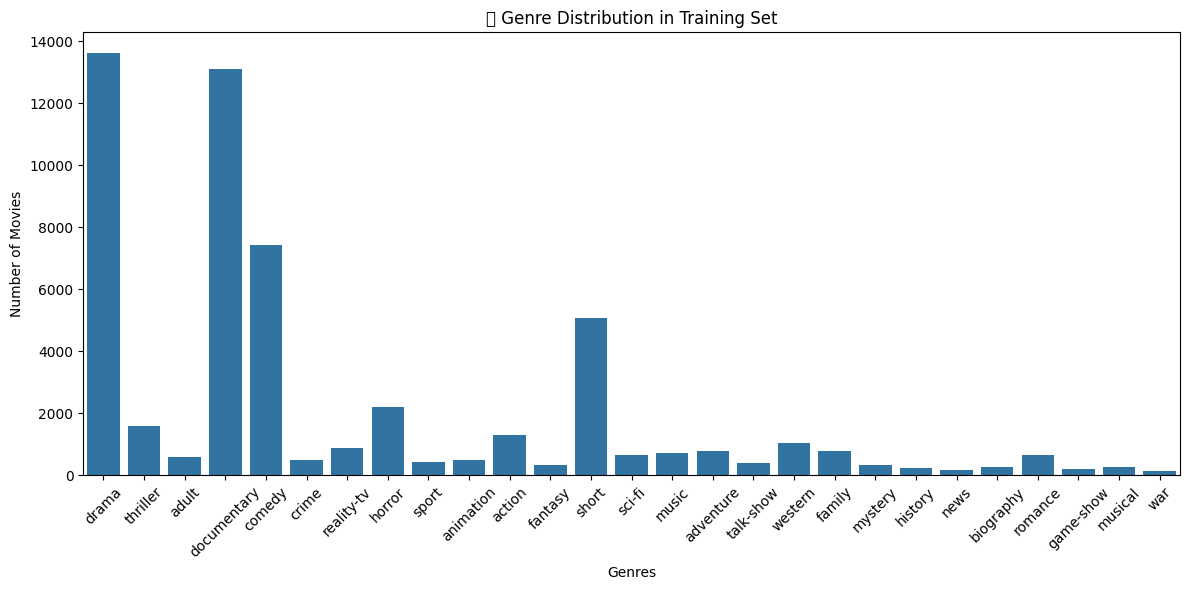

In [12]:
train_plots, train_genres = load_train_data(train_path)

flat_genres = [g for sublist in train_genres for g in sublist]
genre_counts = Counter(flat_genres)

plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("🎬 Genre Distribution in Training Set")
plt.xlabel("Genres")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


In [17]:

min_len = min(len(actual_genres), len(predicted_genres))

actual_genres = actual_genres[:min_len]
predicted_genres = predicted_genres[:min_len]

y_true = mlb.transform(actual_genres)
y_pred = y_pred[:min_len]


In [18]:
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(train_genres)

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_plots)

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [15]:
test_plots = load_test_data(test_path)
X_test = tfidf.transform(test_plots)
y_pred = model.predict(X_test)
predicted_genres = mlb.inverse_transform(y_pred)


In [19]:
actual_genres = load_test_solution(solution_path)

min_len = min(len(actual_genres), len(predicted_genres))
actual_genres = actual_genres[:min_len]
predicted_genres = predicted_genres[:min_len]

y_true = mlb.transform(actual_genres)
y_pred = y_pred[:min_len]

print("✅ Accuracy:", accuracy_score(y_true, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred, target_names=mlb.classes_))


✅ Accuracy: 0.11603321033210331

📋 Classification Report:
               precision    recall  f1-score   support

      action       0.05      0.00      0.01      1351
       adult       0.08      0.01      0.02       574
   adventure       0.02      0.00      0.00       762
   animation       0.00      0.00      0.00       532
   biography       0.00      0.00      0.00       246
      comedy       0.17      0.06      0.09      7426
       crime       0.00      0.00      0.00       496
 documentary       0.27      0.23      0.25     13084
       drama       0.28      0.19      0.23     13731
      family       0.00      0.00      0.00       787
     fantasy       0.00      0.00      0.00       307
   game-show       0.04      0.02      0.02       186
     history       0.00      0.00      0.00       241
      horror       0.09      0.03      0.05      2157
       music       0.06      0.02      0.03       773
     musical       0.00      0.00      0.00       258
     mystery       0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-20-3280836700.py:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


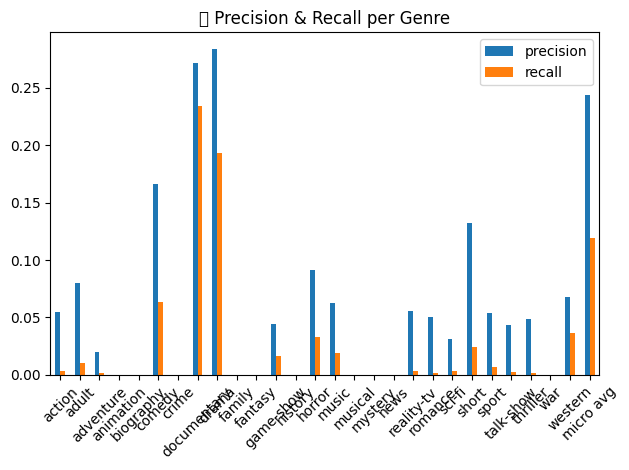

In [20]:
report = classification_report(y_true, y_pred, target_names=mlb.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(12,6))
df_report[:-3][['precision', 'recall']].plot(kind='bar')
plt.title("📈 Precision & Recall per Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
print("📌 Sample Predictions:")
for i in range(min(5, len(test_plots))):
    print(f"\n🔹 Plot {i+1}: {test_plots[i][:120]}...")
    print("   Predicted:", predicted_genres[i])
    print("   Actual:   ", actual_genres[i])


📌 Sample Predictions:

🔹 Plot 1: lr brane loves his life  his car his apartment his job but especially his girlfriend vespa one day while showering vespa...
   Predicted: ()
   Actual:    ['thriller']

🔹 Plot 2: spain march  quico is a very naughty child of three belonging to a wealthy middleclass family since cristinas birth he f...
   Predicted: ('drama',)
   Actual:    ['comedy']

🔹 Plot 3: one year in the life of albin and his family of shepherds in the north of transylvania in direct cinema style this docum...
   Predicted: ('documentary',)
   Actual:    ['documentary']

🔹 Plot 4: his father has died he hasnt spoken with his brother for about  years and has a serious cancer diego is a talented film ...
   Predicted: ('drama',)
   Actual:    ['drama']

🔹 Plot 5: before he was known internationally as a martial arts superstar bruce lee had appeared in a handful of hong kong films a...
   Predicted: ()
   Actual:    ['drama']
